# 2022 Saudi Arabian Grand Prix Analysis

In [1]:
!jt -t grade3 -T -f liberation -tf loraserif -fs 11 -ofs 10 -dfs 10 -tfs 11 -lineh 150 -cursw 3 -cursc r -cellw 100%

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from fastf1.core import Laps
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd
from timple.timedelta import strftimedelta
plotting.setup_mpl()
ff1.Cache.enable_cache('C:/Users/EDGAR/Jupyter Files/FastF1Cache')

## Qualifying Analysis

In [2]:
year=2022
circuit='Saudi Arabia'
quali=ff1.get_session(year,circuit,'Q')
laps=quali.load_laps(with_telemetry=True)

utils          INFO 	Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
utils          INFO 	NumExpr defaulting to 8 threads.
C:\Users\EDGAR\anaconda3\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.7]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weathe

### Q3 Fastest Lap & Driver

In [3]:
q3fl=laps.pick_fastest()[['LapTime','Driver','Team']]
q3fl

LapTime    0 days 00:01:28.200000
Driver                        PER
Team              Red Bull Racing
dtype: object

### Minisector Comparison between Top 4 Qualifying Drivers

#### Who are the top 4 qualifying drivers?

In [4]:
quali.results[:10]
#Perez, Leclerc, Sainz, Verstappen

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,1.0,0.0,0 days 00:01:29.705000,0 days 00:01:28.924000,0 days 00:01:28.200000,NaT,,0.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,2.0,0.0,0 days 00:01:29.039000,0 days 00:01:28.780000,0 days 00:01:28.225000,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,3.0,0.0,0 days 00:01:28.855000,0 days 00:01:28.686000,0 days 00:01:28.402000,NaT,,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,4.0,0.0,0 days 00:01:28.928000,0 days 00:01:28.945000,0 days 00:01:28.461000,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,5.0,0.0,0 days 00:01:30.093000,0 days 00:01:29.584000,0 days 00:01:29.068000,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,6.0,0.0,0 days 00:01:29.680000,0 days 00:01:29.618000,0 days 00:01:29.104000,NaT,,0.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,7.0,0.0,0 days 00:01:29.978000,0 days 00:01:29.295000,0 days 00:01:29.147000,NaT,,0.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,8.0,0.0,0 days 00:01:29.683000,0 days 00:01:29.404000,0 days 00:01:29.183000,NaT,,0.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,9.0,0.0,0 days 00:01:29.891000,0 days 00:01:29.418000,0 days 00:01:29.254000,NaT,,0.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,10.0,0.0,0 days 00:01:29.831000,0 days 00:01:29.546000,0 days 00:01:29.588000,NaT,,0.0


In [5]:
#Getting the laps from all 4 drivers
llec=laps.pick_driver('LEC')
lver=laps.pick_driver('VER')
lsai=laps.pick_driver('SAI')
lper=laps.pick_driver('PER')
#Getting telemetry data from drivers
flec=llec.pick_fastest().get_telemetry().add_distance()
fver=lver.pick_fastest().get_telemetry().add_distance()
fsai=lsai.pick_fastest().get_telemetry().add_distance()
fper=lper.pick_fastest().get_telemetry().add_distance()
#Creating Driver column
flec['Driver']='LEC'
fver['Driver']='VER'
fsai['Driver']='SAI'
fper['Driver']='PER'
#Getting everything in one dataframe
t1=flec.append(fver)
t2=t1.append(fsai)
telemetry=t2.append(fper)

In [6]:
# telemetry.info()

In [7]:
#Creating the minisectors (doing 30 - 10 per sector)
nmini=30
#Grabbing circuit distance
cdist=max(telemetry['Distance'])
#Dividing circuit distance by number of minisectors to have our minisector distance
minilen=cdist/nmini
#Calculating distances at which the next minisector begins
minis=[0]
for b in range(0,(nmini-1)):
    minis.append(minilen*(b+1))
#Assigning every row in the dataset to a minisector, so we always know which minisector the cars were located in.
telemetry['Minisector']=telemetry['Distance'].apply(
    lambda dist:(
        int((dist // minilen)+1)))

In [8]:
#Finding the fastest driver per minisector so we can color it in the minisector map
avgspeed=telemetry.groupby(['Minisector','Driver'])['Speed'].mean().reset_index()
fastest = avgspeed.loc[avgspeed.groupby(['Minisector'])['Speed'].idxmax()]
fastest = fastest[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_Driver'})

In [9]:
fastest['Fastest_Driver'].unique()
#4 drivers had a fastest minisector
# fastest['Fastest_Driver']=='LEC'

array(['PER', 'VER', 'LEC', 'SAI'], dtype=object)

In [10]:
# Fastest driver per minisector + telemetry
telemetry = telemetry.merge(fastest, on=['Minisector'])

# Ordering by distance
telemetry = telemetry.sort_values(by=['Distance'])

# Converting driver name to integer
telemetry.loc[telemetry['Fastest_Driver'] == 'LEC', 'Fastest_Driver_int'] = 2
telemetry.loc[telemetry['Fastest_Driver'] == 'VER', 'Fastest_Driver_int'] = 4
telemetry.loc[telemetry['Fastest_Driver'] == 'SAI', 'Fastest_Driver_int'] = 3
telemetry.loc[telemetry['Fastest_Driver'] == 'PER', 'Fastest_Driver_int'] = 1

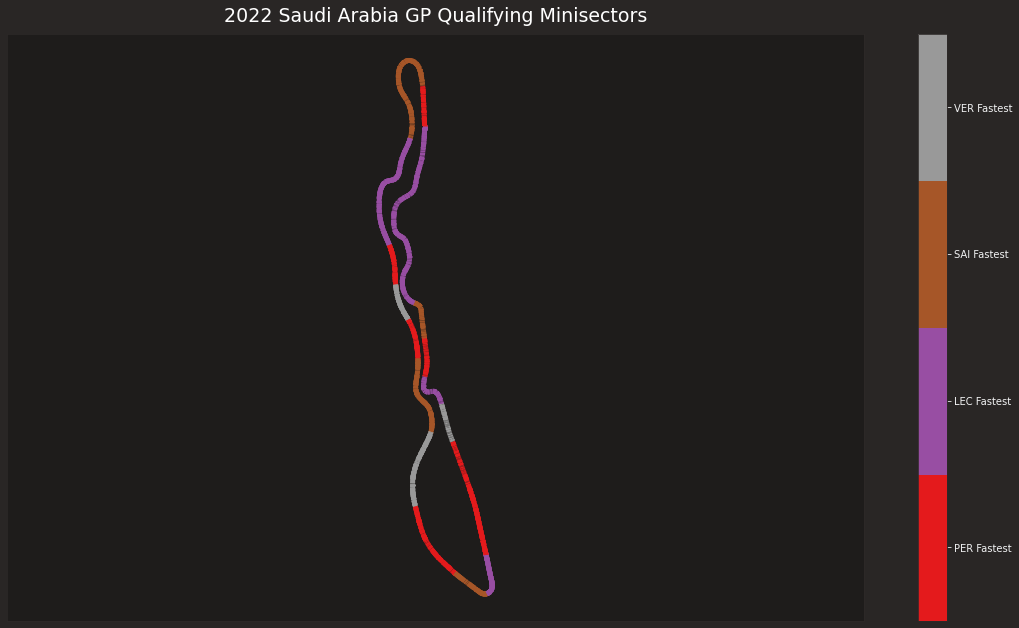

In [11]:
# Finally, plotting.
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_Driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('Set1', 4)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

# plt.rcParams['figure.figsize'] = [18, 10]
plt.gcf().set_size_inches(19.2,10.8)
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.title(f'{year} {circuit} GP Qualifying Minisectors',color='white')
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,6))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(['PER Fastest', 'LEC Fastest','SAI Fastest','VER Fastest'])

plt.savefig(f"{year} {circuit} GP Qualifying Minisectors.png", dpi=100)

plt.show()

### Qualifying Time Difference Graph

In [12]:
#Getting every driver except Tsunoda - he did not participate in qualifying due to a water system issue
drv = pd.unique(quali.laps['Driver'])
drv=np.array(drv)
index=9
drv= np.delete(drv, index)
drv
# tsu=laps.pick_driver('TSU')
# tsu['LapTime']

array(['PER', 'LEC', 'SAI', 'VER', 'OCO', 'RUS', 'ALO', 'BOT', 'GAS',
       'NOR', 'RIC', 'ZHO', 'MSC', 'STR', 'HAM', 'ALB', 'HUL', 'LAT',
       'TSU'], dtype=object)

In [13]:
#Sorting laps by LapTime
fl_list= list()
for d in drv:
    drv_fl = quali.laps.pick_driver(d).pick_fastest()
    fl_list.append(drv_fl)
fl = Laps(fl_list).sort_values(by='LapTime').reset_index(drop=True)

In [2]:
#getting the fastest lap
pole=fl.pick_fastest()
fl['LapTimeDiff']=fl['LapTime']-pole['LapTime']
print(fl[['Driver', 'LapTime', 'LapTimeDiff']])
fl=fl.drop(index=18)
fl

NameError: name 'fl' is not defined

In [15]:
#creating a list of team colors for the graph
tcol = list()
for index, lap in fl.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
#     print(lap['Team'])
    tcol.append(color)

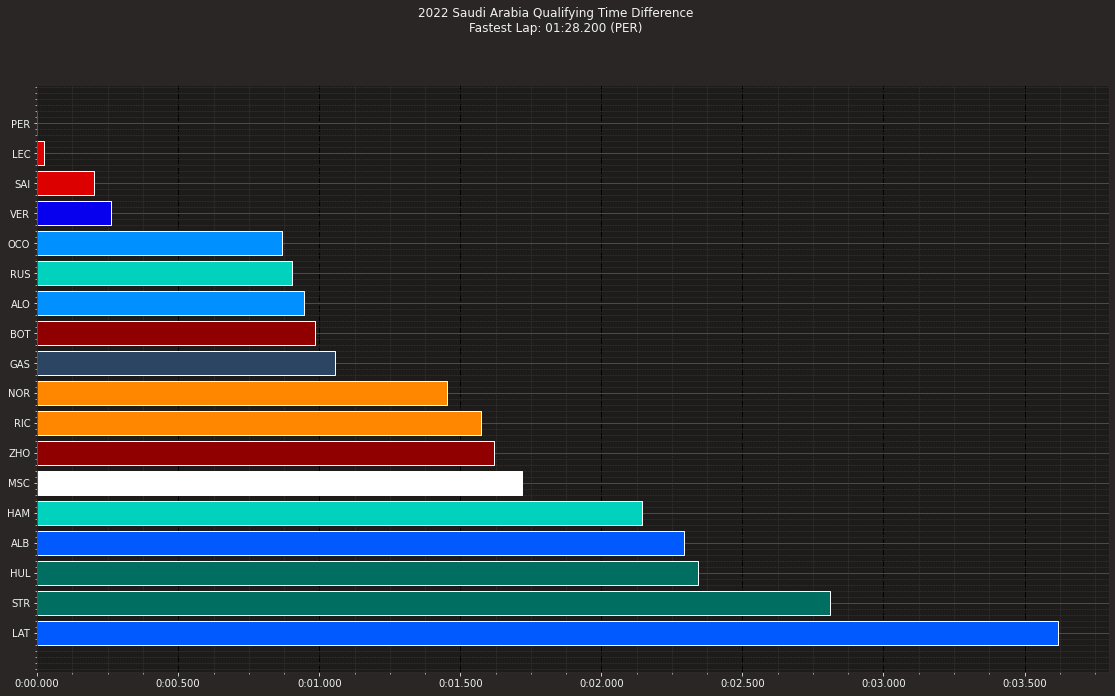

In [16]:
#Finally, plotting and titling
fig, ax = plt.subplots()
plt.gcf().set_size_inches(19.2,10.8)
ax.barh(fl.index, fl['LapTimeDiff'],color=tcol, edgecolor='white')
ax.set_yticks(fl.index)
ax.set_yticklabels(fl['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='-.', color='black', zorder=-1000)
lapstr = strftimedelta(pole['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Qualifying Time Difference\n"
             f"Fastest Lap: {lapstr} ({pole['Driver']})")
plt.savefig(f"{year} {circuit} Qualifying Time Difference.png", dpi=100)

plt.show()

### Qualifying Pace Over Distance Analysis - Top 4 Drivers

In [17]:
#Getting the laps from all 4 drivers
llec=laps.pick_driver('LEC')
lver=laps.pick_driver('VER')
lsai=laps.pick_driver('SAI')
lper=laps.pick_driver('PER')
#Getting telemetry data from drivers
flec=llec.pick_fastest().get_telemetry().add_distance()
fver=lver.pick_fastest().get_telemetry().add_distance()
fsai=lsai.pick_fastest().get_telemetry().add_distance()
fper=lper.pick_fastest().get_telemetry().add_distance()
#Creating Driver column
flec['Driver']='LEC'
fver['Driver']='VER'
fsai['Driver']='SAI'
fper['Driver']='PER'
#Getting everything in one dataframe
t1=flec.append(fver)
t2=t1.append(fsai)
telemetry=t2.append(fper)

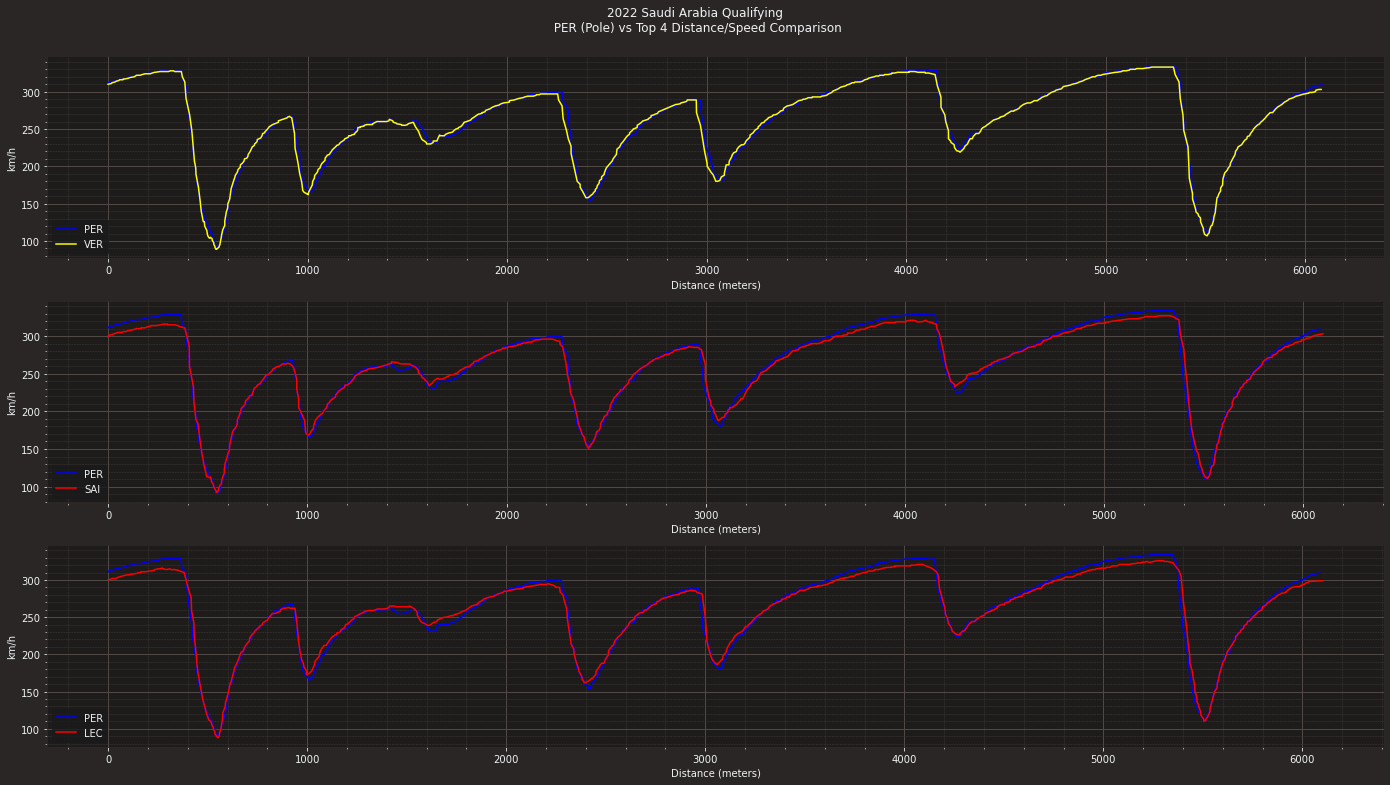

In [18]:
# plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots(3, constrained_layout=True)
fig.suptitle(f"{year} {circuit} Qualifying\n PER (Pole) vs Top 4 Distance/Speed Comparison")
# plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.gcf().set_size_inches(19.2,10.8)
ax[0].plot(fper['Distance'], fper['Speed'], label='PER',color='blue')
ax[0].plot(fver['Distance'], fver['Speed'], label='VER',color='yellow')
ax[0].set(ylabel='km/h', xlabel='Distance (meters)')
ax[0].legend(loc="lower left")

ax[1].plot(fper['Distance'], fper['Speed'], label='PER',color='blue')
ax[1].plot(fsai['Distance'], fsai['Speed'], label='SAI',color='red')
ax[1].set(ylabel='km/h', xlabel='Distance (meters)')
ax[1].legend(loc="lower left")

ax[2].plot(fper['Distance'], fper['Speed'], label='PER',color='blue')
ax[2].plot(flec['Distance'], flec['Speed'], label='LEC',color='red')
ax[2].set(ylabel='km/h', xlabel='Distance (meters)')
ax[2].legend(loc="lower left")

plt.savefig(f"{year} {circuit} Qualifying Distance-Speed Comparison.png",dpi=100)
plt.show()

In [19]:
# flec['Time']

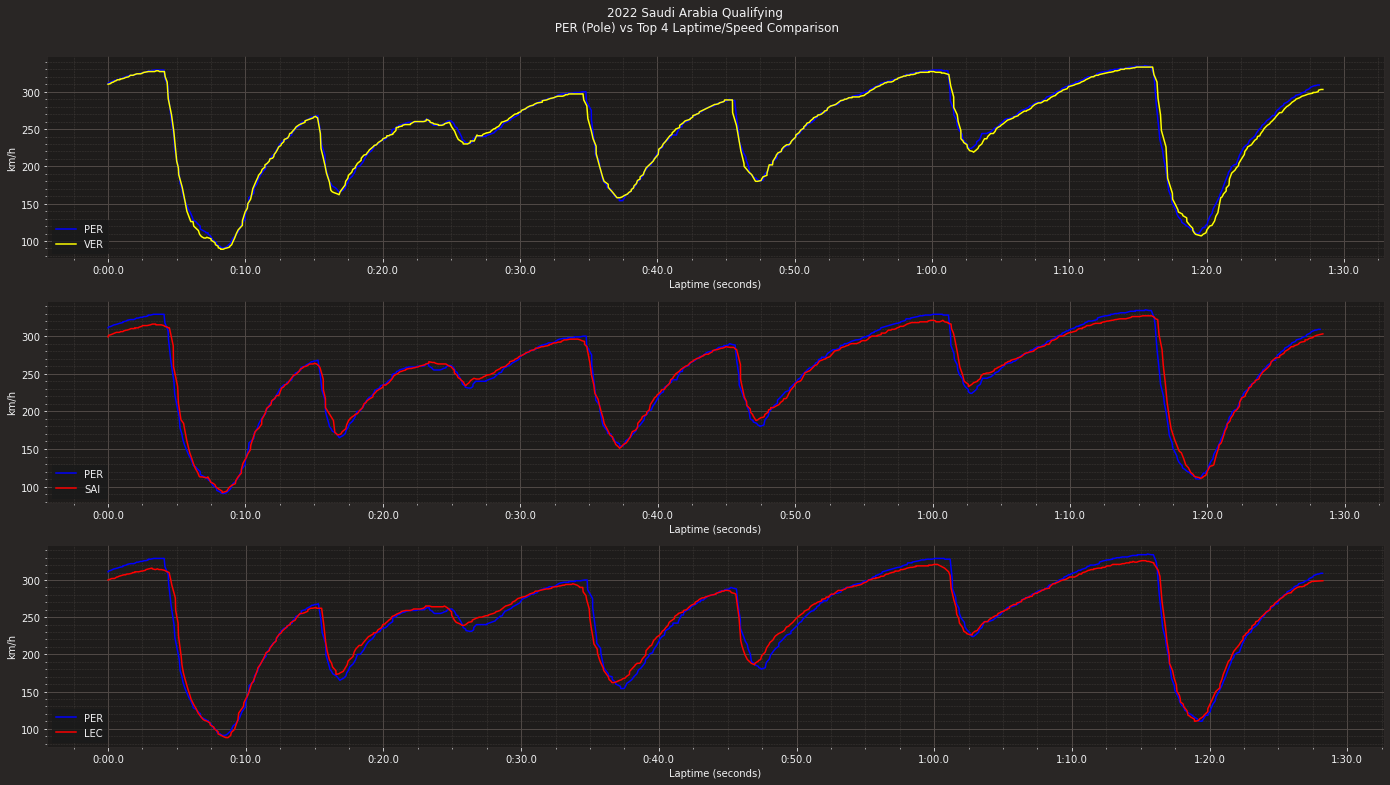

In [20]:
fig, ax = plt.subplots(3,constrained_layout=True)
fig.suptitle(f"{year} {circuit} Qualifying\n PER (Pole) vs Top 4 Laptime/Speed Comparison")
# plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.gcf().set_size_inches(19.2,10.8)
# ax[0].plot(flec['Time'], flec['Speed'], label='LEC', color='red')
# ax[0].plot(fver['Time'], fver['Speed'], label='VER', color='blue')
# ax[0].set(ylabel='km/h', xlabel='Laptime (seconds)')
# ax[0].legend(loc="lower left")

ax[0].plot(fper['Time'], fper['Speed'], label='PER', color='blue')
ax[0].plot(fver['Time'], fver['Speed'], label='VER', color='yellow')
ax[0].set(ylabel='km/h', xlabel='Laptime (seconds)')
ax[0].legend(loc="lower left")

ax[1].plot(fper['Time'], fper['Speed'], label='PER', color='blue')
ax[1].plot(fsai['Time'], fsai['Speed'], label='SAI', color='red')
ax[1].set(ylabel='km/h', xlabel='Laptime (seconds)')
ax[1].legend(loc="lower left")

ax[2].plot(fper['Time'], fper['Speed'], label='PER', color='blue')
ax[2].plot(flec['Time'], flec['Speed'], label='LEC', color='red')
ax[2].set(ylabel='km/h', xlabel='Laptime (seconds)')
ax[2].legend(loc="lower left")



plt.savefig(f"{year} {circuit} Qualifying Laptime-Speed Comparison.png",dpi=100)
plt.show()

### Comparing Teammates

In [21]:
#We're comparing teammates' quali times to each other.

In [22]:
#Creating lap dataframes and sorting them by LapTime.

zhou=pd.DataFrame(quali.laps.pick_driver('ZHO').pick_fastest()).T
bot=pd.DataFrame(quali.laps.pick_driver('BOT').pick_fastest()).T
merge1=pd.merge(zhou,bot,how='outer')
fl1 = Laps(merge1).sort_values(by='LapTime').reset_index(drop=True)
fl1.dropna(axis=1)

schu=pd.DataFrame(quali.laps.pick_driver('MSC').pick_fastest()).T
magn=pd.DataFrame(quali.laps.pick_driver('MAG').pick_fastest()).T
merge2=pd.merge(schu,magn,how='outer')
fl2=Laps(merge2).sort_values(by='LapTime').reset_index(drop=True)
fl2.dropna(axis=1)

ricc=pd.DataFrame(quali.laps.pick_driver('RIC').pick_fastest()).T
norr=pd.DataFrame(quali.laps.pick_driver('NOR').pick_fastest()).T
merge3=pd.merge(ricc,norr,how='outer')
fl3=Laps(merge3).sort_values(by='LapTime').reset_index(drop=True)
fl3.dropna(axis=1)

vers=pd.DataFrame(quali.laps.pick_driver('VER').pick_fastest()).T
pere=pd.DataFrame(quali.laps.pick_driver('PER').pick_fastest()).T
merge4=pd.merge(vers,pere,how='outer')
fl4 = Laps(merge4).sort_values(by='LapTime').reset_index(drop=True)
fl4.dropna(axis=1)

lecl=pd.DataFrame(quali.laps.pick_driver('LEC').pick_fastest()).T
sain=pd.DataFrame(quali.laps.pick_driver('SAI').pick_fastest()).T
merge5=pd.merge(lecl,sain,how='outer')
fl5=Laps(merge5).sort_values(by='LapTime').reset_index(drop=True)
fl5.dropna(axis=1)

,Time,DriverNumber,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 02:18:57.189000,16,0 days 00:01:28.225000,20.0,7.0,0 days 00:00:32.134000,0 days 00:00:28.347000,0 days 00:00:27.744000,0 days 02:18:01.098000,0 days 02:18:29.445000,...,True,SOFT,4.0,True,0 days 02:17:28.964000,Ferrari,LEC,1,True,2022-03-26 19:03:04.907
1,0 days 02:10:53.492000,55,0 days 00:01:28.402000,17.0,6.0,0 days 00:00:32.289000,0 days 00:00:28.482000,0 days 00:00:27.631000,0 days 02:09:57.379000,0 days 02:10:25.861000,...,True,SOFT,8.0,False,0 days 02:09:25.090000,Ferrari,SAI,1,True,2022-03-26 18:55:01.033


In [23]:
best1=fl1.pick_fastest()
fl1['LapTimeDiff']=fl1['LapTime']-best1['LapTime']
print(fl1[['Driver', 'LapTime', 'LapTimeDiff']])

best2=fl2.pick_fastest()
fl2['LapTimeDiff']=fl2['LapTime']-best2['LapTime']
print(fl2[['Driver', 'LapTime', 'LapTimeDiff']])

best3=fl3.pick_fastest()
fl3['LapTimeDiff']=fl3['LapTime']-best3['LapTime']
print(fl3[['Driver', 'LapTime', 'LapTimeDiff']])

best4=fl4.pick_fastest()
fl4['LapTimeDiff']=fl4['LapTime']-best4['LapTime']
print(fl4[['Driver', 'LapTime', 'LapTimeDiff']])

best5=fl5.pick_fastest()
fl5['LapTimeDiff']=fl5['LapTime']-best5['LapTime']
print(fl5[['Driver', 'LapTime', 'LapTimeDiff']])



  Driver                LapTime            LapTimeDiff
0    BOT 0 days 00:01:29.183000        0 days 00:00:00
1    ZHO 0 days 00:01:29.819000 0 days 00:00:00.636000
  Driver                LapTime            LapTimeDiff
0    MAG 0 days 00:01:29.588000        0 days 00:00:00
1    MSC 0 days 00:01:29.920000 0 days 00:00:00.332000
  Driver                LapTime            LapTimeDiff
0    NOR 0 days 00:01:29.651000        0 days 00:00:00
1    RIC 0 days 00:01:29.773000 0 days 00:00:00.122000
  Driver                LapTime            LapTimeDiff
0    PER 0 days 00:01:28.200000        0 days 00:00:00
1    VER 0 days 00:01:28.461000 0 days 00:00:00.261000
  Driver                LapTime            LapTimeDiff
0    LEC 0 days 00:01:28.225000        0 days 00:00:00
1    SAI 0 days 00:01:28.402000 0 days 00:00:00.177000


In [24]:
tcol1 = list()
for index, lap in fl1.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol1.append(color)

tcol2 = list()
for index, lap in fl2.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol2.append(color)
    
tcol3 = list()
for index, lap in fl3.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol3.append(color)

tcol4 = list()
for index, lap in fl4.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol4.append(color)

tcol5 = list()
for index, lap in fl5.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol5.append(color)

# dcol1 = list()
# for index, lap in fl1.iterlaps():
#     color = ff1.plotting.driver_color(lap['Driver'])
#     dcol1.append(color)

# dcol2 = list()
# for index, lap in fl2.iterlaps():
#     color = ff1.plotting.driver_color(lap['Driver'])
#     dcol2.append(color)
    
# dcol3 = list()
# for index, lap in fl3.iterlaps():
#     color = ff1.plotting.driver_color(lap['Driver'])
#     dcol3.append(color)
    
# dcol4 = list()
# for index, lap in fl4.iterlaps():
#     color = ff1.plotting.driver_color(lap['Driver'])
#     dcol4.append(color)

# dcol5 = list()
# for index, lap in fl5.iterlaps():
#     color = ff1.plotting.driver_color(lap['Driver'])
#     dcol5.append(color)

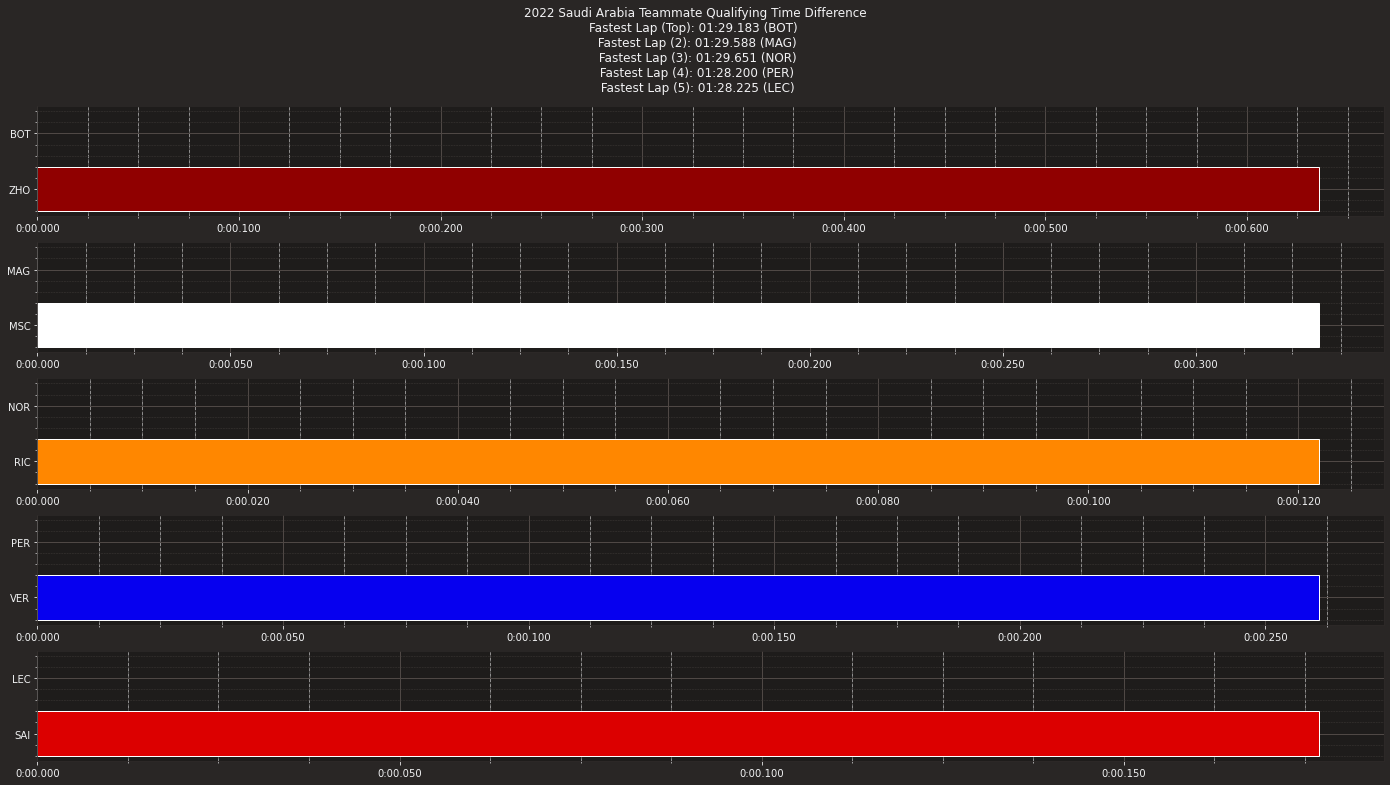

In [25]:
fig, ax = plt.subplots(5,constrained_layout=True)
plt.gcf().set_size_inches(19.2,10.8)
ax[0].barh(fl1.index, fl1['LapTimeDiff'],color=tcol1, edgecolor='white')
ax[0].set_yticks(fl1.index)
ax[0].set_yticklabels(fl1['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr1 = strftimedelta(best1['LapTime'], '%m:%s.%ms')

ax[1].barh(fl2.index, fl2['LapTimeDiff'],color=tcol2, edgecolor='white')
ax[1].set_yticks(fl2.index)
ax[1].set_yticklabels(fl2['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr2 = strftimedelta(best2['LapTime'], '%m:%s.%ms')

ax[2].barh(fl3.index, fl3['LapTimeDiff'],color=tcol3, edgecolor='white')
ax[2].set_yticks(fl3.index)
ax[2].set_yticklabels(fl3['Driver'])
ax[2].invert_yaxis()
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr3 = strftimedelta(best3['LapTime'], '%m:%s.%ms')

ax[3].barh(fl4.index, fl4['LapTimeDiff'],color=tcol4, edgecolor='white')
ax[3].set_yticks(fl4.index)
ax[3].set_yticklabels(fl4['Driver'])
ax[3].invert_yaxis()
ax[3].set_axisbelow(True)
ax[3].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr4 = strftimedelta(best4['LapTime'], '%m:%s.%ms')

ax[4].barh(fl5.index, fl5['LapTimeDiff'],color=tcol5, edgecolor='white')
ax[4].set_yticks(fl5.index)
ax[4].set_yticklabels(fl5['Driver'])
ax[4].invert_yaxis()
ax[4].set_axisbelow(True)
ax[4].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr5 = strftimedelta(best5['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr1} ({best1['Driver']}) \n Fastest Lap (2): {lapstr2} ({best2['Driver']})\n Fastest Lap (3): {lapstr3} ({best3['Driver']})\n Fastest Lap (4): {lapstr4} ({best4['Driver']})\n Fastest Lap (5): {lapstr5} ({best5['Driver']})")


plt.savefig(f"{year} {circuit} Qualifying Teammate Time Difference 1.png", dpi=100)

plt.show()

In [26]:
hulk=pd.DataFrame(quali.laps.pick_driver('HUL').pick_fastest()).T
stro=pd.DataFrame(quali.laps.pick_driver('STR').pick_fastest()).T
merge6=pd.merge(hulk,stro,how='outer')
fl6=Laps(merge6).sort_values(by='LapTime').reset_index(drop=True)
fl6.dropna(axis=1)

russ=pd.DataFrame(quali.laps.pick_driver('RUS').pick_fastest()).T
hami=pd.DataFrame(quali.laps.pick_driver('HAM').pick_fastest()).T
merge7=pd.merge(russ,hami,how='outer')
fl7=Laps(merge7).sort_values(by='LapTime').reset_index(drop=True)
fl7.dropna(axis=1)

# gasl=pd.DataFrame(quali.laps.pick_driver('GAS').pick_fastest()).T
# tsun=pd.DataFrame(quali.laps.pick_driver('TSU').pick_fastest()).T
# merge8=pd.merge(gasl,tsun,how='inner')
# fl8=Laps(merge8).sort_values(by='LapTime').reset_index(drop=True)
# fl8.dropna(axis=1)
# print(fl8)

alon=pd.DataFrame(quali.laps.pick_driver('ALO').pick_fastest()).T
ocon=pd.DataFrame(quali.laps.pick_driver('OCO').pick_fastest()).T
merge9=pd.merge(alon,ocon,how='outer')
fl9=Laps(merge9).sort_values(by='LapTime').reset_index(drop=True)
fl9.dropna(axis=1)

albo=pd.DataFrame(quali.laps.pick_driver('ALB').pick_fastest()).T
lati=pd.DataFrame(quali.laps.pick_driver('LAT').pick_fastest()).T
merge10=pd.merge(albo,lati,how='outer')
fl10=Laps(merge10).sort_values(by='LapTime').reset_index(drop=True)
fl10.dropna(axis=1)

best6=fl6.pick_fastest()
fl6['LapTimeDiff']=fl6['LapTime']-best6['LapTime']
print(fl6[['Driver', 'LapTime', 'LapTimeDiff']])

best7=fl7.pick_fastest()
fl7['LapTimeDiff']=fl7['LapTime']-best7['LapTime']
print(fl7[['Driver', 'LapTime', 'LapTimeDiff']])

# best8=fl8.pick_fastest()
# fl8['LapTimeDiff']=fl8['LapTime']-best8['LapTime']
# print(fl8[['Driver', 'LapTime', 'LapTimeDiff']])

best9=fl9.pick_fastest()
fl9['LapTimeDiff']=fl9['LapTime']-best9['LapTime']
print(fl9[['Driver', 'LapTime', 'LapTimeDiff']])

best10=fl10.pick_fastest()
fl10['LapTimeDiff']=fl10['LapTime']-best10['LapTime']
print(fl10[['Driver', 'LapTime', 'LapTimeDiff']])

  Driver                LapTime            LapTimeDiff
0    HUL 0 days 00:01:30.543000        0 days 00:00:00
1    STR 0 days 00:01:31.009000 0 days 00:00:00.466000
  Driver                LapTime            LapTimeDiff
0    RUS 0 days 00:01:29.104000        0 days 00:00:00
1    HAM 0 days 00:01:30.343000 0 days 00:00:01.239000
  Driver                LapTime            LapTimeDiff
0    OCO 0 days 00:01:29.068000        0 days 00:00:00
1    ALO 0 days 00:01:29.147000 0 days 00:00:00.079000
  Driver                LapTime            LapTimeDiff
0    ALB 0 days 00:01:30.492000        0 days 00:00:00
1    LAT 0 days 00:01:31.817000 0 days 00:00:01.325000


In [27]:
tcol6 = list()
for index, lap in fl6.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol6.append(color)

tcol7 = list()
for index, lap in fl7.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol7.append(color)
    
# tcol8 = list()
# for index, lap in fl8.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol8.append(color)

tcol9 = list()
for index, lap in fl9.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol9.append(color)

tcol10 = list()
for index, lap in fl10.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol10.append(color)

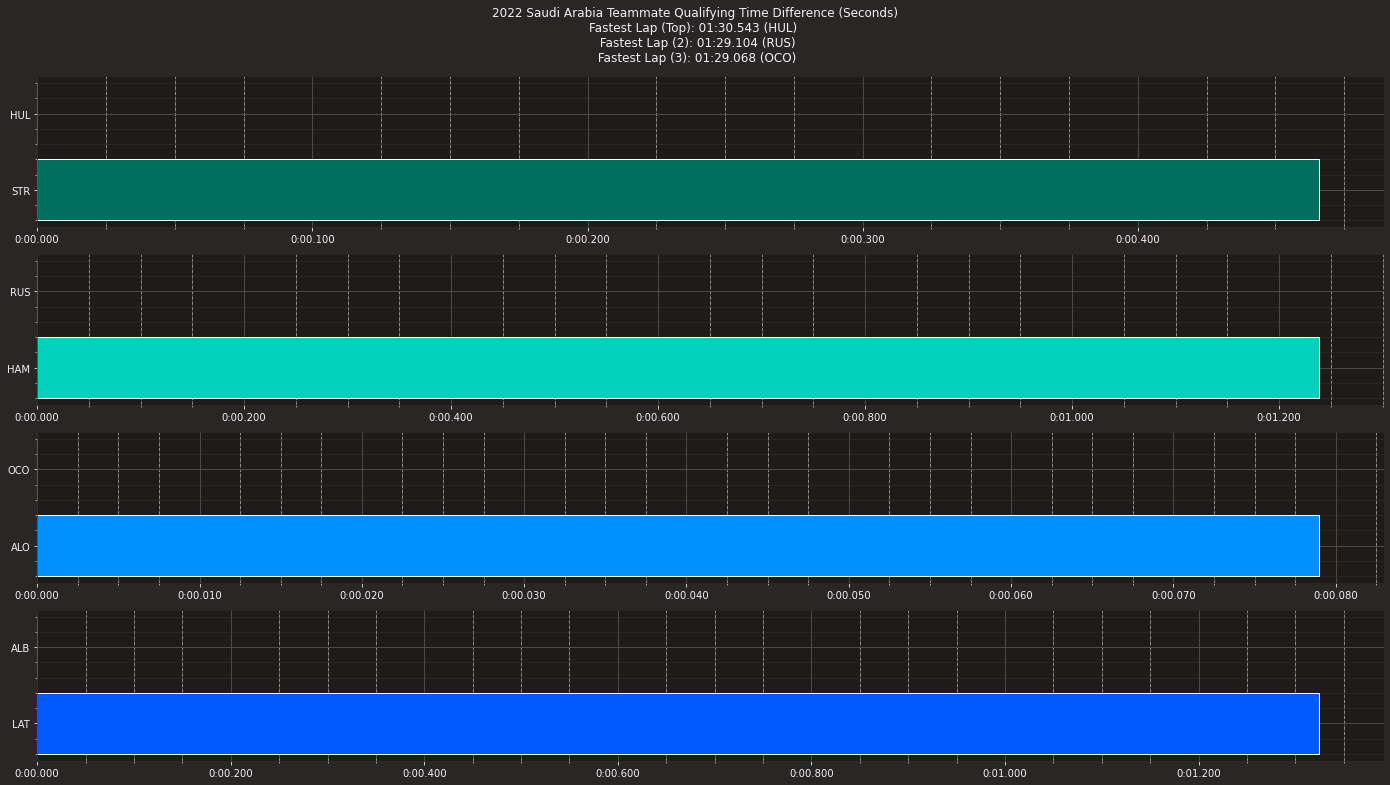

In [28]:
fig, ax = plt.subplots(4,constrained_layout=True)
plt.gcf().set_size_inches(19.2,10.8)
ax[0].barh(fl6.index, fl6['LapTimeDiff'],color=tcol6, edgecolor='white')
ax[0].set_yticks(fl6.index)
ax[0].set_yticklabels(fl6['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr6 = strftimedelta(best6['LapTime'], '%m:%s.%ms')

ax[1].barh(fl7.index, fl7['LapTimeDiff'],color=tcol7, edgecolor='white')
ax[1].set_yticks(fl7.index)
ax[1].set_yticklabels(fl7['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr7 = strftimedelta(best7['LapTime'], '%m:%s.%ms')

# ax[2].barh(fl8.index, fl8['LapTimeDiff'],color=tcol3, edgecolor='white')
# ax[2].set_yticks(fl8.index)
# ax[2].set_yticklabels(fl8['Driver'])
# ax[2].invert_yaxis()
# ax[2].set_axisbelow(True)
# ax[2].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
# lapstr3 = strftimedelta(best3['LapTime'], '%m:%s.%ms')

ax[2].barh(fl9.index, fl9['LapTimeDiff'],color=tcol9, edgecolor='white')
ax[2].set_yticks(fl9.index)
ax[2].set_yticklabels(fl9['Driver'])
ax[2].invert_yaxis()
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr9 = strftimedelta(best9['LapTime'], '%m:%s.%ms')

ax[3].barh(fl10.index, fl10['LapTimeDiff'],color=tcol10, edgecolor='white')
ax[3].set_yticks(fl10.index)
ax[3].set_yticklabels(fl10['Driver'])
ax[3].invert_yaxis()
ax[3].set_axisbelow(True)
ax[3].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr10 = strftimedelta(best10['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Teammate Qualifying Time Difference (Seconds)\n"
             f"Fastest Lap (Top): {lapstr6} ({best6['Driver']}) \n Fastest Lap (2): {lapstr7} ({best7['Driver']})\n Fastest Lap (3): {lapstr9} ({best9['Driver']})")


plt.savefig(f"{year} {circuit} Qualifying Teammate Time Difference 2.png", dpi=100)

plt.show()
#NOTE: Since Tsunoda's data cannot be accessed, I can't do a comparison of his best qualifying time - and therefore can't graph it.

## Race Analysis

### Fastest Minisectors in the race

In [29]:
year=2022
circuit='Saudi Arabian Grand Prix'

race=ff1.get_session(year,circuit,'R')
lapsr=race.load_laps(with_telemetry=True)

C:\Users\EDGAR\anaconda3\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.2.7]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	No lap data for driver 22
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: 

In [30]:
race.results[:4]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,4.0,NaT,NaT,NaT,0 days 01:24:19.293000,Finished,25.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,2.0,2.0,NaT,NaT,NaT,0 days 01:24:19.842000,Finished,19.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,3.0,3.0,NaT,NaT,NaT,0 days 01:24:27.390000,Finished,15.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,4.0,1.0,NaT,NaT,NaT,0 days 01:24:30.093000,Finished,12.0


In [31]:
#Getting the laps from all 4 drivers
llec=lapsr.pick_driver('LEC')
lsai=lapsr.pick_driver('SAI')
lver=lapsr.pick_driver('VER')
lper=lapsr.pick_driver('PER')
#Getting telemetry data from drivers
flec=llec.pick_fastest().get_telemetry().add_distance()
fver=lver.pick_fastest().get_telemetry().add_distance()
fsai=lsai.pick_fastest().get_telemetry().add_distance()
fper=lper.pick_fastest().get_telemetry().add_distance()
#Creating Driver column
flec['Driver']='LEC'
fsai['Driver']='SAI'
fver['Driver']='VER'
fper['Driver']='PER'
#Getting everything in one dataframe
t1=flec.append(fsai)
t2=t1.append(fver)
telemetry=t2.append(fper)

In [32]:
#Creating the minisectors (doing 30 - 10 per sector)
nmini=30
#Grabbing circuit distance
cdist=max(telemetry['Distance'])
#Dividing circuit distance by number of minisectors to have our minisector distance
minilen=cdist/nmini
#Calculating distances at which the next minisector begins
minis=[0]
for b in range(0,(nmini-1)):
    minis.append(minilen*(b+1))
#Assigning every row in the dataset to a minisector, so we always know which minisector the cars were located in.
telemetry['Minisector']=telemetry['Distance'].apply(
    lambda dist:(
        int((dist // minilen)+1)))

In [33]:
#Finding the fastest driver per minisector so we can color it in the minisector map
avgspeed=telemetry.groupby(['Minisector','Driver'])['Speed'].mean().reset_index()
fastest = avgspeed.loc[avgspeed.groupby(['Minisector'])['Speed'].idxmax()]
fastest = fastest[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_Driver'})

In [34]:
fastest['Fastest_Driver'].unique()
#4 drivers had a fastest minisector
fastest['Fastest_Driver']=='LEC'

0       True
4       True
10     False
12      True
19     False
20      True
26     False
30     False
32      True
37     False
41     False
47     False
48      True
53     False
59     False
60      True
67     False
71     False
72      True
77     False
83     False
87     False
91     False
92      True
96      True
100     True
107    False
108     True
112     True
117    False
Name: Fastest_Driver, dtype: bool

In [35]:
# Fastest driver per minisector + telemetry
telemetry = telemetry.merge(fastest, on=['Minisector'])

# Ordering by distance
telemetry = telemetry.sort_values(by=['Distance'])

# Converting driver name to integer
telemetry.loc[telemetry['Fastest_Driver'] == 'LEC', 'Fastest_Driver_int'] = 1
telemetry.loc[telemetry['Fastest_Driver'] == 'SAI', 'Fastest_Driver_int'] = 2
telemetry.loc[telemetry['Fastest_Driver'] == 'VER', 'Fastest_Driver_int'] = 3
telemetry.loc[telemetry['Fastest_Driver'] == 'PER', 'Fastest_Driver_int'] = 4

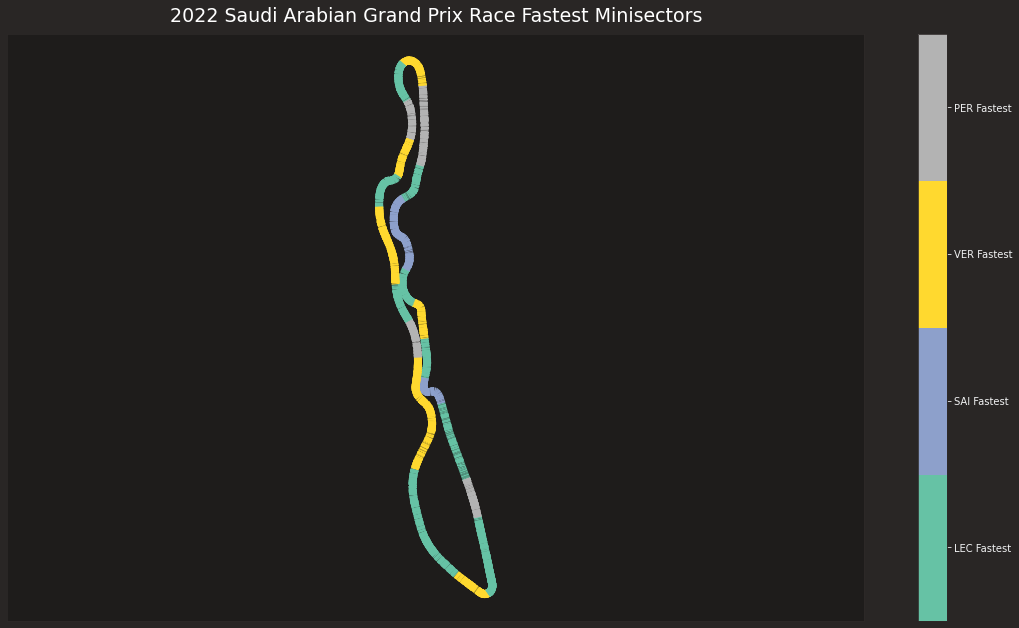

In [36]:
# Finally, plotting.
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_Driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('Set2', 4)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(8)


plt.gca().add_collection(lc_comp)
plt.gcf().set_size_inches(19.2,10.8)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.title(f'{year} {circuit} Race Fastest Minisectors',color='white')
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,6))
cbar.set_ticks(np.arange(1.5, 5.5))
cbar.set_ticklabels(['LEC Fastest', 'SAI Fastest','VER Fastest','PER Fastest'])

plt.savefig(f"{year}{circuit} Race Minisectors.jpeg", dpi=100)

plt.show()

### Race Pace Comparison - Leclerc vs. Verstappen

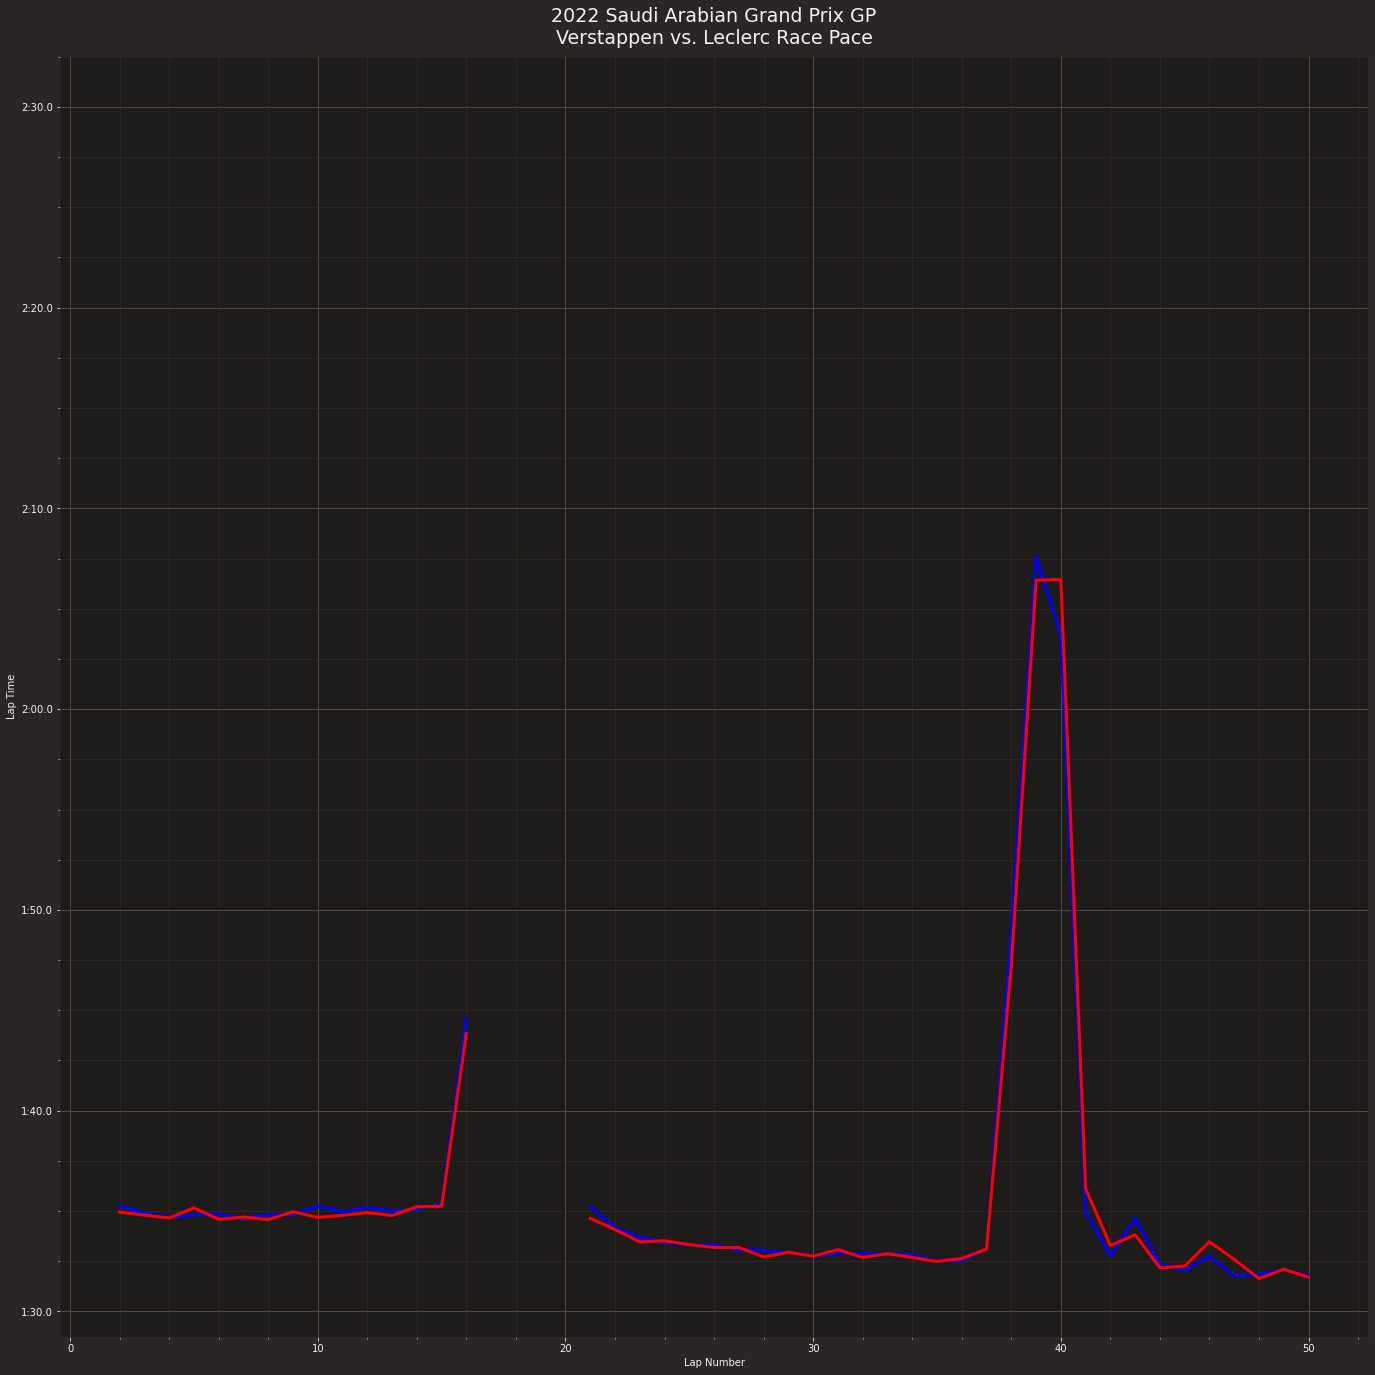

In [37]:
ver = lapsr.pick_driver('VER')
lec = lapsr.pick_driver('LEC')
fig, ax = plt.subplots(tight_layout=True)
plt.gcf().set_size_inches(19.2,19.2)
ax.plot(ver['LapNumber'], ver['LapTime'], color='blue',linewidth=3)
ax.plot(lec['LapNumber'], lec['LapTime'], color='red',linewidth=3)
ax.set_title(f"{year} {circuit} GP\n Verstappen vs. Leclerc Race Pace ")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.savefig(f"{year} {circuit} Grand Prix Verstappen vs Leclerc Race Pace Comparison.png",dpi=100)
plt.show()
#the lack of data is due to the restart.

### Race Pace Comparison Between Teammates

In [50]:
race.results.TeamName.unique()

array(['Red Bull Racing', 'Ferrari', 'Mercedes', 'Alpine', 'McLaren',
       'AlphaTauri', 'Haas F1 Team', 'Alfa Romeo', 'Aston Martin',
       'Williams'], dtype=object)

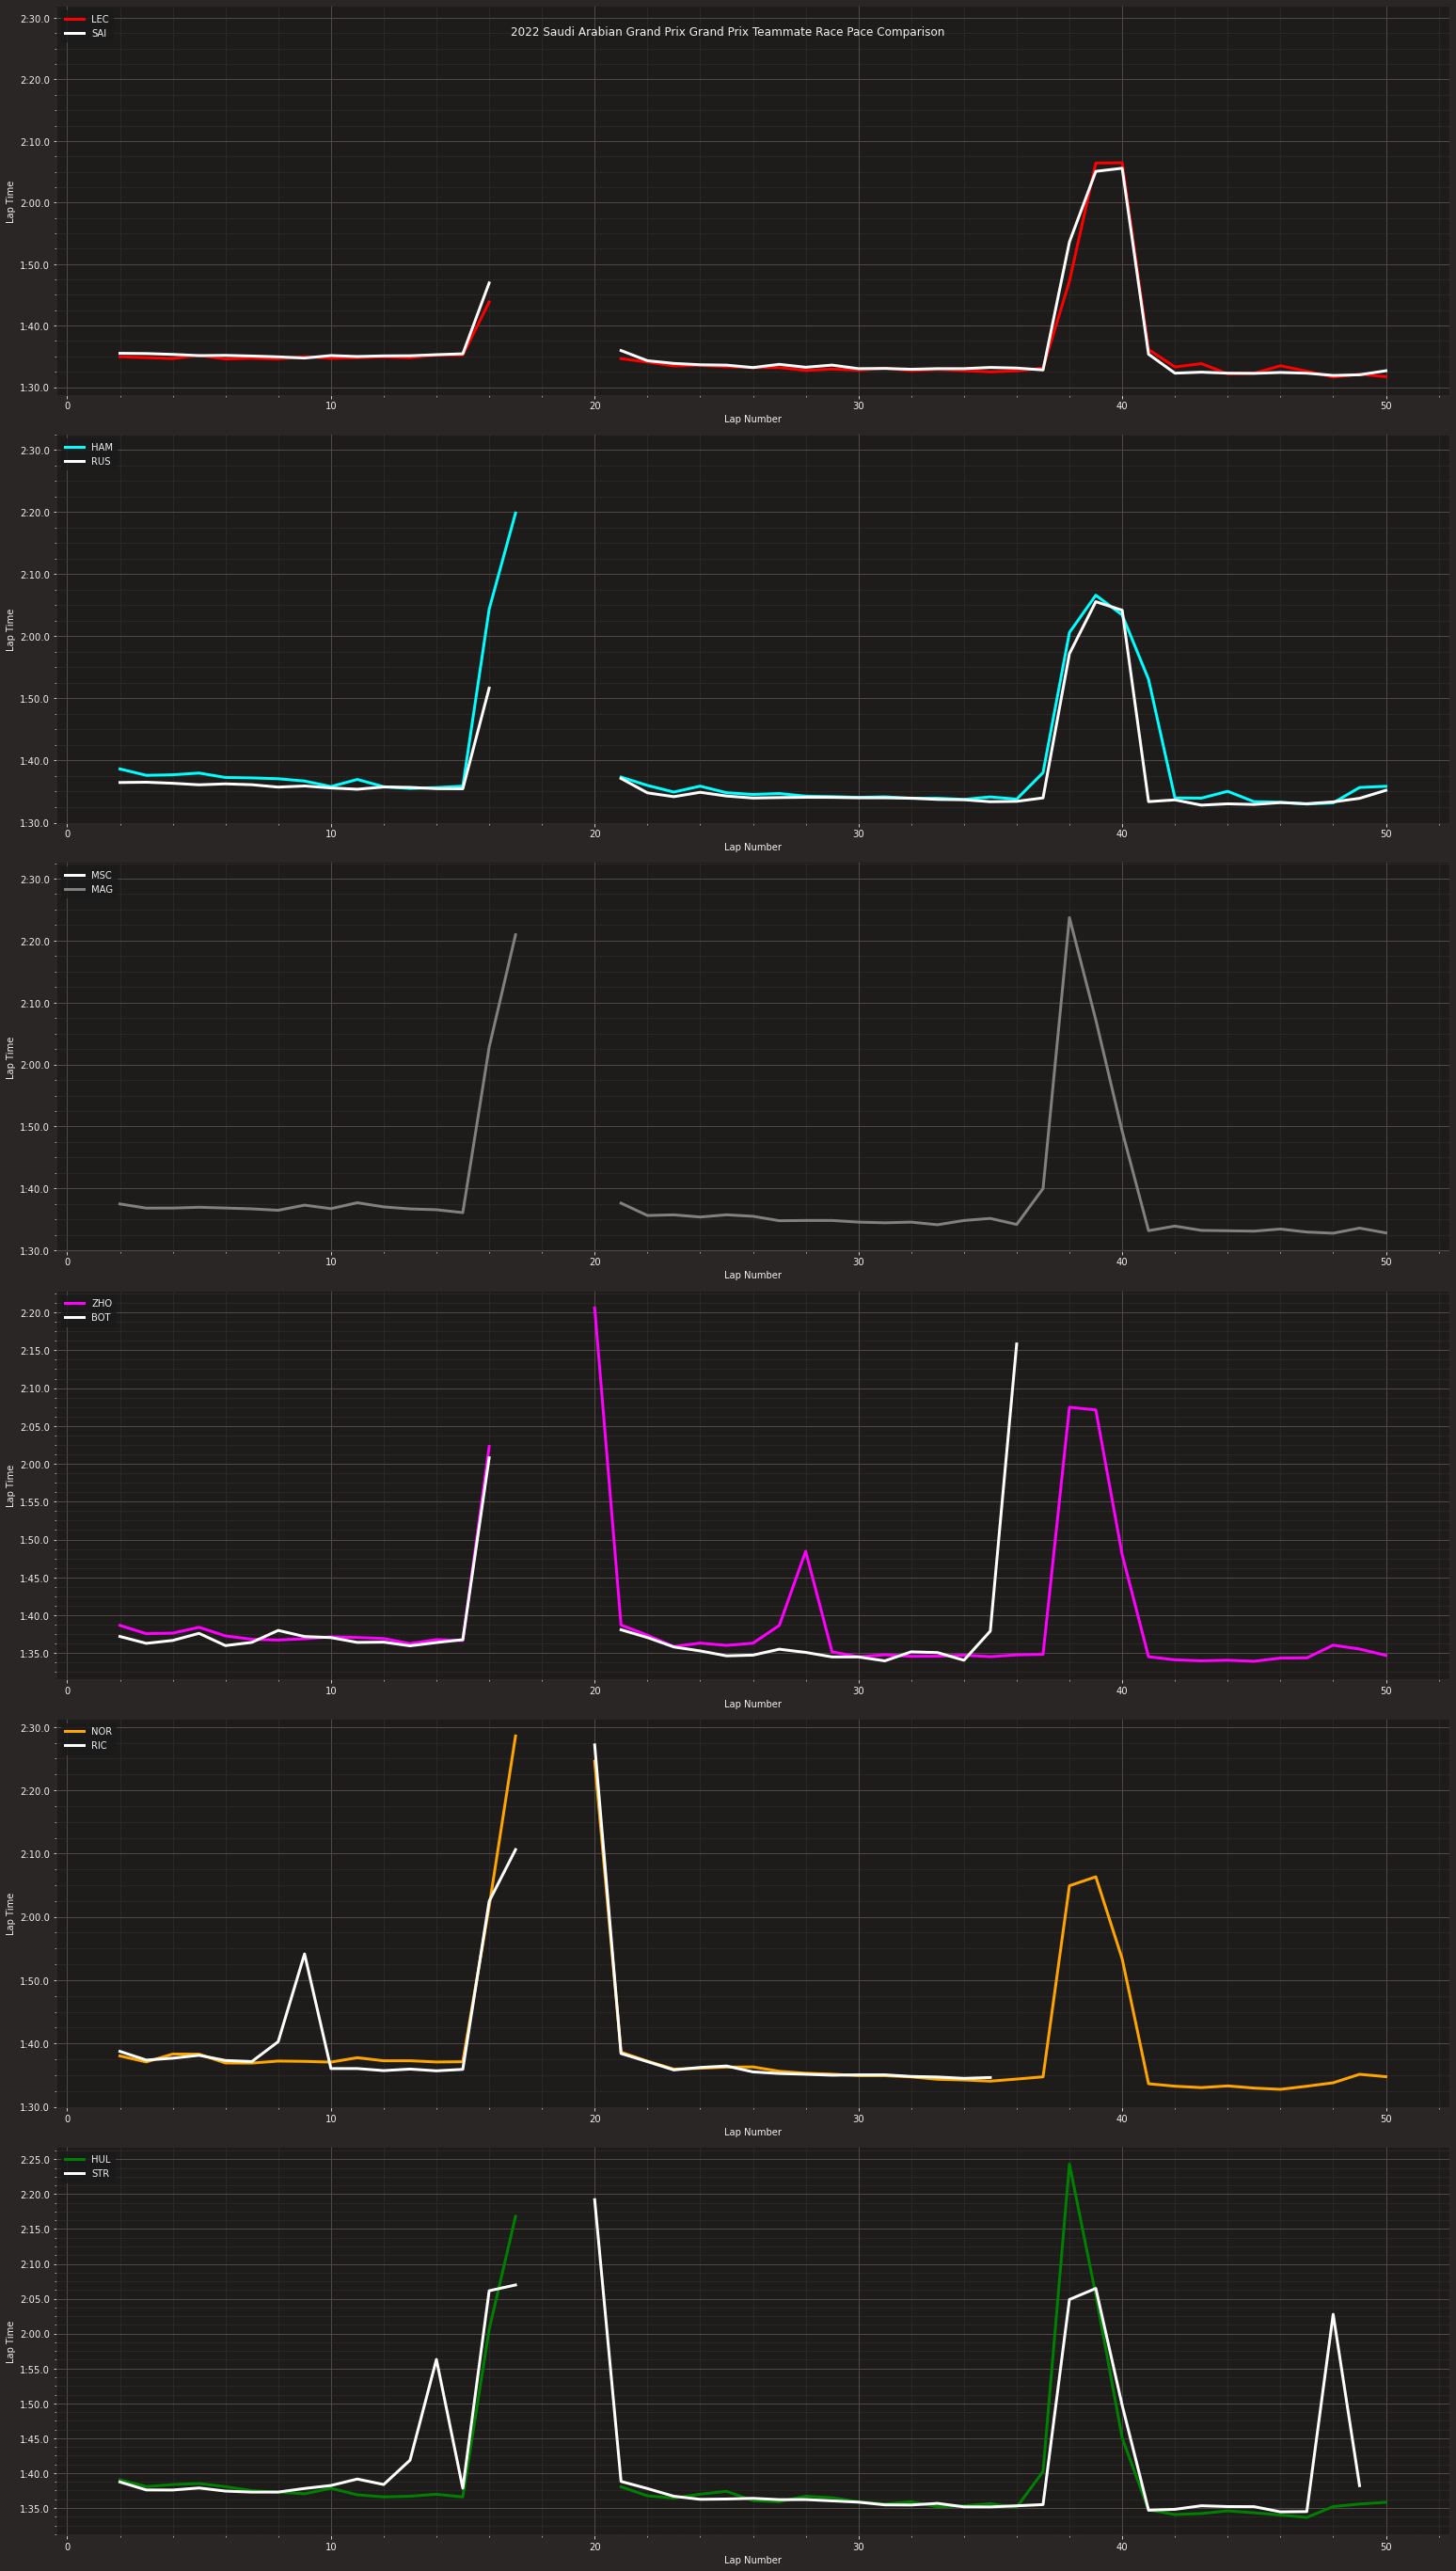

In [39]:
lecl=lapsr.pick_driver('LEC')
sain=lapsr.pick_driver('SAI')

hami=lapsr.pick_driver('HAM')
russ=lapsr.pick_driver('RUS')

magn=lapsr.pick_driver('MAG')
schu=lapsr.pick_driver('MSC')

bott=lapsr.pick_driver('BOT')
zhou=lapsr.pick_driver('ZHO')

norr=lapsr.pick_driver('NOR')
ricc=lapsr.pick_driver('RIC')

hulk=lapsr.pick_driver('HUL')
stro=lapsr.pick_driver('STR')

fig, ax = plt.subplots(6, tight_layout=True)
plt.gcf().set_size_inches(21.6,38.4)
ax[0].plot(lecl['LapNumber'], lecl['LapTime'], label='LEC', color='red',linewidth=3)
ax[0].plot(sain['LapNumber'], sain['LapTime'], label='SAI', color='white',linewidth=3)
ax[0].set_xlabel("Lap Number")
ax[0].set_ylabel("Lap Time")
ax[0].legend(loc="upper left")

ax[1].plot(hami['LapNumber'], hami['LapTime'], label='HAM',color='cyan',linewidth=3)
ax[1].plot(russ['LapNumber'], russ['LapTime'], label='RUS',color='white',linewidth=3)
ax[1].set_xlabel("Lap Number")
ax[1].set_ylabel("Lap Time")
ax[1].legend(loc="upper left")


ax[2].plot(bott['LapNumber'], bott['LapTime'], label='BOT',color='magenta',linewidth=3)
ax[2].plot(magn['LapNumber'], zhou['LapTime'], label='ZHO',color='white',linewidth=3)
ax[2].set_xlabel("Lap Number")
ax[2].set_ylabel("Lap Time")
ax[2].legend(loc="upper left")


ax[3].plot(magn['LapNumber'], magn['LapTime'], label='HUL',color='white',linewidth=3)
ax[3].plot(schu['LapNumber'], schu['LapTime'], label='MSC',color='grey',linewidth=3)
ax[3].set_xlabel("Lap Number")
ax[3].set_ylabel("Lap Time")
ax[3].legend(loc="upper left")

ax[4].plot(norr['LapNumber'], norr['LapTime'], label='NOR',color='orange',linewidth=3)
ax[4].plot(ricc['LapNumber'], ricc['LapTime'], label='RIC',color='white',linewidth=3)
ax[4].set_xlabel("Lap Number")
ax[4].set_ylabel("Lap Time")
ax[4].legend(loc="upper left")

ax[5].plot(hulk['LapNumber'], hulk['LapTime'], label='HUL',color='green',linewidth=3)
ax[5].plot(stro['LapNumber'], stro['LapTime'], label='STR',color='white',linewidth=3)
ax[5].set_xlabel("Lap Number")
ax[5].set_ylabel("Lap Time")
ax[5].legend(loc="upper left")

plt.suptitle(f"{year} {circuit} Grand Prix Teammate Race Pace Comparison")
plt.savefig(f"{year} {circuit} Grand Prix Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

### Team Race Pace Difference

In [ ]:
#Note: I found it fairer to compare the race pace of each team's fastest driver, as they extracted the most out of the car during the race.

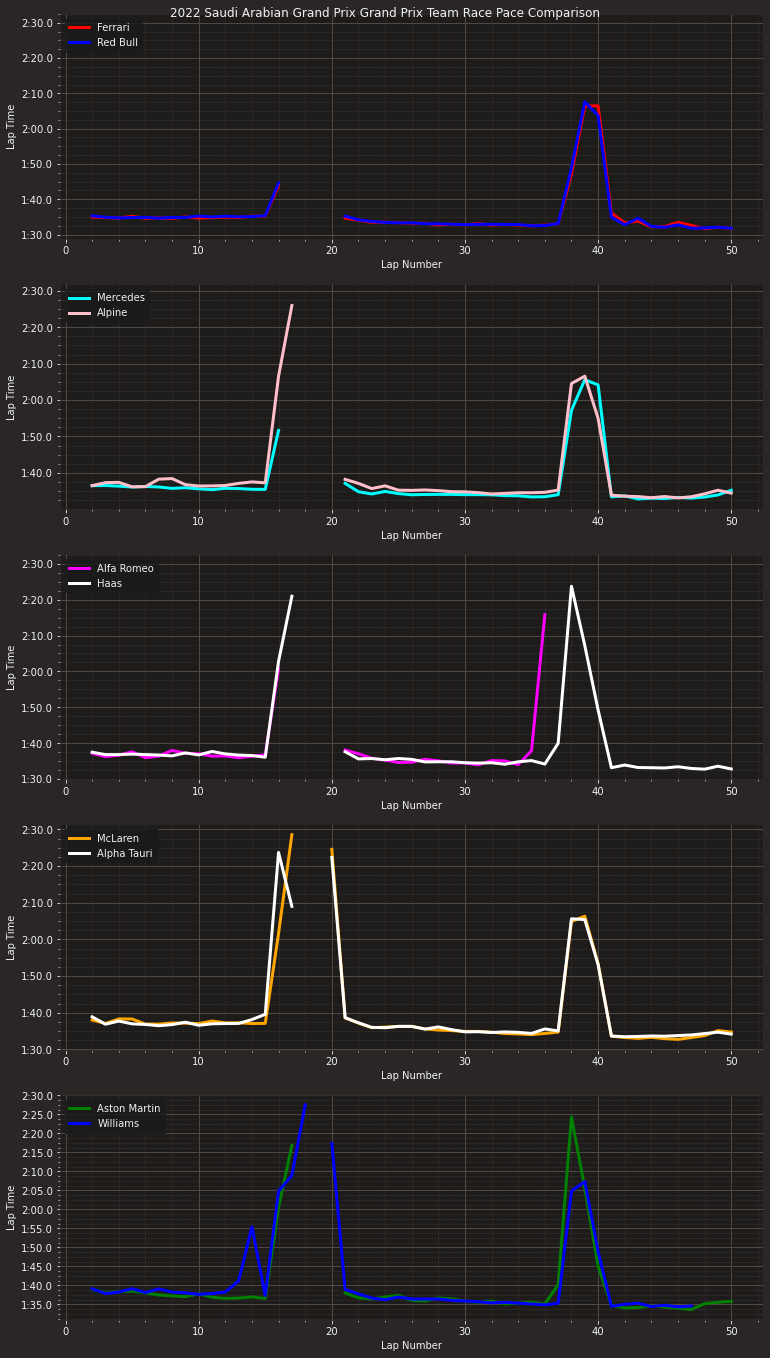

In [56]:
lecl=lapsr.pick_driver('LEC')
sain=lapsr.pick_driver('SAI')

hami=lapsr.pick_driver('HAM')
russ=lapsr.pick_driver('RUS')

magn=lapsr.pick_driver('MAG')
schu=lapsr.pick_driver('MSC')

bott=lapsr.pick_driver('BOT')
zhou=lapsr.pick_driver('ZHO')

norr=lapsr.pick_driver('NOR')
ricc=lapsr.pick_driver('RIC')

hulk=lapsr.pick_driver('HUL')
stro=lapsr.pick_driver('STR')

vers=lapsr.pick_driver('VER')
ocon=lapsr.pick_driver('OCO')
albo=lapsr.pick_driver('ALB')
gasl=lapsr.pick_driver('GAS')

fig, ax = plt.subplots(5, tight_layout=True)
plt.gcf().set_size_inches(10.8,19.2)
ax[0].plot(lecl['LapNumber'], lecl['LapTime'], label='Ferrari', color='red',linewidth=3)
ax[0].plot(vers['LapNumber'], vers['LapTime'], label='Red Bull', color='blue',linewidth=3)
ax[0].set_xlabel("Lap Number")
ax[0].set_ylabel("Lap Time")
ax[0].legend(loc="upper left")

ax[1].plot(russ['LapNumber'], russ['LapTime'], label='Mercedes',color='cyan',linewidth=3)
ax[1].plot(ocon['LapNumber'], ocon['LapTime'], label='Alpine',color='pink',linewidth=3)
ax[1].set_xlabel("Lap Number")
ax[1].set_ylabel("Lap Time")
ax[1].legend(loc="upper left")

ax[2].plot(bott['LapNumber'], bott['LapTime'], label='Alfa Romeo',color='magenta',linewidth=3)
ax[2].plot(magn['LapNumber'], magn['LapTime'], label='Haas',color='white',linewidth=3)
ax[2].set_xlabel("Lap Number")
ax[2].set_ylabel("Lap Time")
ax[2].legend(loc="upper left")

ax[3].plot(norr['LapNumber'], norr['LapTime'], label='McLaren',color='orange',linewidth=3)
ax[3].plot(gasl['LapNumber'], gasl['LapTime'], label='Alpha Tauri',color='white',linewidth=3)
ax[3].set_xlabel("Lap Number")
ax[3].set_ylabel("Lap Time")
ax[3].legend(loc="upper left")

ax[4].plot(hulk['LapNumber'], hulk['LapTime'], label='Aston Martin',color='green',linewidth=3)
ax[4].plot(albo['LapNumber'], albo['LapTime'], label='Williams',color='blue',linewidth=3)
ax[4].set_xlabel("Lap Number")
ax[4].set_ylabel("Lap Time")
ax[4].legend(loc="upper left")

plt.suptitle(f"{year} {circuit} Grand Prix Team Race Pace Comparison")
plt.savefig(f"{year} {circuit} Grand Prix Team Race Pace Comparison 1080p.jpeg",dpi=100)
plt.show()

In [40]:
# type(lapsr['Time'])


### Race Finishing Time Difference Between Teammates

In [41]:
#Getting total time on track of the drivers in seconds
lapsr['TimeSeconds']=lapsr['Time'].dt.total_seconds()
lecl=lapsr.pick_driver('LEC')
lecl=lecl.loc[lecl['TimeSeconds'] == max(lecl['TimeSeconds'].dropna())]
sain=lapsr.pick_driver('SAI')
sain=sain.loc[sain['TimeSeconds'] == max(sain['TimeSeconds'].dropna())]
merge1=pd.merge(lecl,sain,how='outer')
fl1 = Laps(merge1).sort_values(by='TimeSeconds').reset_index(drop=True)
print(fl1.dropna(axis=1))

hami=lapsr.pick_driver('HAM')
hami=hami.loc[hami['TimeSeconds'] == max(hami['TimeSeconds'].dropna())]
russ=lapsr.pick_driver('RUS')
russ=russ.loc[russ['TimeSeconds'] == max(russ['TimeSeconds'].dropna())]
merge2=pd.merge(hami,russ,how='outer')
fl2=Laps(merge2).sort_values(by='TimeSeconds').reset_index(drop=True)
print(fl2.dropna(axis=1))

hulk=lapsr.pick_driver('HUL')
hulk=hulk.loc[hulk['TimeSeconds'] == max(hulk['TimeSeconds'].dropna())]
stro=lapsr.pick_driver('STR')
stro=stro.loc[stro['TimeSeconds'] == max(stro['TimeSeconds'].dropna())]
merge3=pd.merge(hulk,stro,how='outer')
fl3=Laps(merge3).sort_values(by='TimeSeconds').reset_index(drop=True)
print(fl3)


                    Time DriverNumber                LapTime  LapNumber  \
0 0 days 02:26:47.711000           16 0 days 00:01:31.703000       50.0   
1 0 days 02:26:55.231000           55 0 days 00:01:32.665000       50.0   

   Stint            Sector1Time            Sector2Time            Sector3Time  \
0    2.0 0 days 00:00:34.007000 0 days 00:00:29.191000 0 days 00:00:28.505000   
1    2.0 0 days 00:00:34.040000 0 days 00:00:29.487000 0 days 00:00:29.138000   

      Sector1SessionTime     Sector2SessionTime  ... Compound  TyreLife  \
0 0 days 02:25:50.015000 0 days 02:26:19.206000  ...     HARD      34.0   
1 0 days 02:25:56.606000 0 days 02:26:26.093000  ...     HARD      34.0   

   FreshTyre           LapStartTime     Team Driver TrackStatus  IsAccurate  \
0       True 0 days 02:25:16.008000  Ferrari    LEC           2        True   
1       True 0 days 02:25:22.566000  Ferrari    SAI           2        True   

             LapStartDate TimeSeconds  
0 2022-03-27 18:26:16.018 

In [42]:
b1=fl1.loc[fl1['TimeSeconds']==min(fl1['TimeSeconds'])]
best1=float(b1.TimeSeconds)
fl1['RaceTimeDiff']=fl1['TimeSeconds']-best1
print(fl1[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

b2=fl2.loc[fl2['TimeSeconds']==min(fl2['TimeSeconds'])]
best2=float(b2.TimeSeconds)
fl2['RaceTimeDiff']=fl2['TimeSeconds']-best2
print(fl2[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

b3=fl3.loc[fl3['TimeSeconds']==min(fl3['TimeSeconds'])]
best3=float(b3.TimeSeconds)
fl3['RaceTimeDiff']=fl3['TimeSeconds']-best3
print(fl3[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

  Driver  TimeSeconds  RaceTimeDiff
0    LEC     8807.711          0.00
1    SAI     8815.231          7.52
  Driver  TimeSeconds  RaceTimeDiff
0    RUS     8839.890         0.000
1    HAM     8881.069        41.179
  Driver  TimeSeconds  RaceTimeDiff
0    STR     8821.681         0.000
1    HUL     8898.883        77.202


In [43]:
tcol1 = list()
for index, lap in fl1.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol1.append(color)

tcol2 = list()
for index, lap in fl2.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol2.append(color)
    
tcol3 = list()
for index, lap in fl3.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol3.append(color)

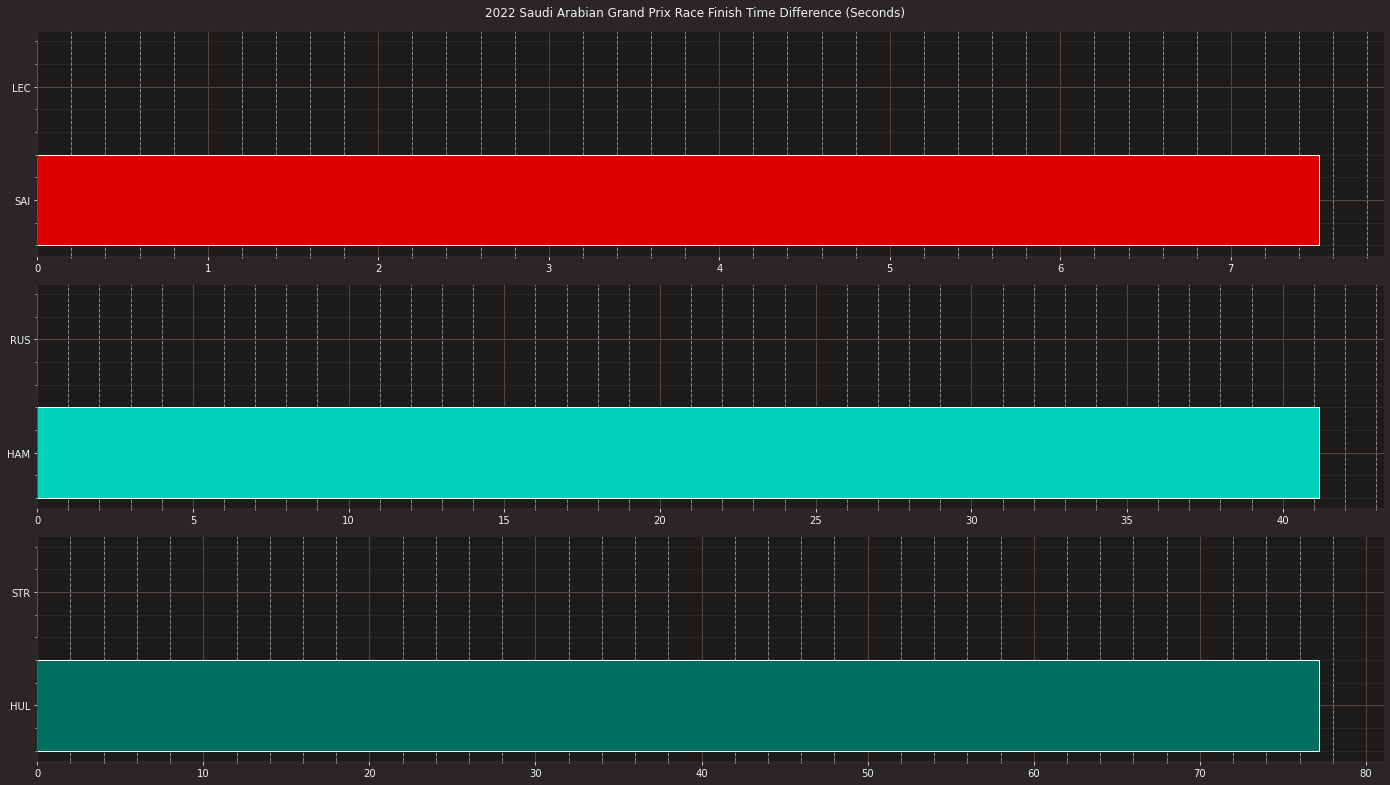

In [44]:
fig, ax = plt.subplots(3,constrained_layout=True)

plt.gcf().set_size_inches(19.2,10.8)

ax[0].barh(fl1.index, fl1['RaceTimeDiff'],color=tcol1, edgecolor='white')
ax[0].set_yticks(fl1.index)
ax[0].set_yticklabels(fl1['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
# lapstr1 = strftimedelta(best1, '%s.%ms')

ax[1].barh(fl2.index, fl2['RaceTimeDiff'],color=tcol2, edgecolor='white')
ax[1].set_yticks(fl2.index)
ax[1].set_yticklabels(fl2['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
# lapstr2 = strftimedelta(best2, '%s.%ms')

ax[2].barh(fl3.index, fl3['RaceTimeDiff'],color=tcol3, edgecolor='white')
ax[2].set_yticks(fl3.index)
ax[2].set_yticklabels(fl3['Driver'])
ax[2].invert_yaxis()
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
# lapstr3 = strftimedelta(best3, '%%s.%ms')
plt.suptitle(f"{year} {circuit} Teammate Race Finish Time Difference (Seconds)")


plt.savefig(f"{year} {circuit} Teammate RaceTime Difference.png", dpi=100)

plt.show()

### Tyre Strategy Analysis - not yet working, needs fixing.

In [45]:
driver_stints = lapsr[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(['Driver', 'Stint', 'Compound']).count().reset_index()
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})
driver_stints = driver_stints.sort_values(by=['Stint'])
compound_colors = {'SOFT': 'Red','MEDIUM': 'Yellow','HARD': 'White'}
# driver_stints = driver_stints[driver_stints.Compound != 'UNKNOWN']

TypeError: string indices must be integers

<Figure size 2764.8x1555.2 with 0 Axes>

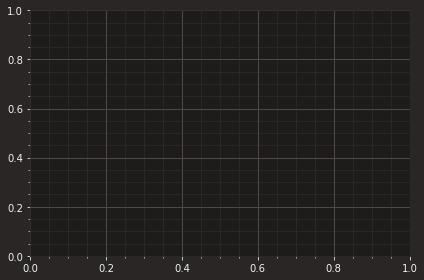

In [46]:
plt.gcf().set_size_inches(38.4,21.6)
# plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(tight_layout=True)
for driver in [driver['Driver']['Code'] for driver in race.results]:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]
    
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh([driver], stint['StintLength'], left=previous_stint_end,
            color=compound_colors[stint['Compound']], 
            edgecolor = "black")
        
        previous_stint_end = previous_stint_end + stint['StintLength']
plt.title(f'Tyre Strategy - {year} {circuit} ')
plt.xlabel('Lap')
plt.gca().invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig(f"{year} {circuit} Tyre Strategies.jpeg", dpi=100)
plt.show()